<a href="https://colab.research.google.com/github/Deepak14ap/Image_classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import warnings
import tensorflow.keras.preprocessing.image as im
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/seg_train.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/mountain/7539.jpg  
  inflating: seg_train/mountain/7551.jpg  
  inflating: seg_train/mountain/7560.jpg  
  inflating: seg_train/mountain/7565.jpg  
  inflating: seg_train/mountain/7578.jpg  
  inflating: seg_train/mountain/7581.jpg  
  inflating: seg_train/mountain/7586.jpg  
  inflating: seg_train/mountain/7647.jpg  
  inflating: seg_train/mountain/7652.jpg  
  inflating: seg_train/mountain/7654.jpg  
  inflating: seg_train/mountain/7662.jpg  
  inflating: seg_train/mountain/767.jpg  
  inflating: seg_train/mountain/7672.jpg  
  inflating: seg_train/mountain/7679.jpg  
  inflating: seg_train/mountain/7681.jpg  
  inflating: seg_train/mountain/7693.jpg  
  inflating: seg_train/mountain/7695.jpg  
  inflating: seg_train/mountain/7698.jpg  
  inflating: seg_train/mountain/7700.jpg  
  inflating: seg_train/mountain/771.jpg  
  inflating: seg_train/mountain/7715.jpg  
  inflating: seg_train/mountain/7744.jpg  
  inf

In [ ]:
!unzip /content/drive/MyDrive/seg_test.zip

Archive:  /content/drive/MyDrive/seg_test.zip
   creating: seg_test/buildings/
  inflating: seg_test/buildings/20057.jpg  
  inflating: seg_test/buildings/20060.jpg  
  inflating: seg_test/buildings/20061.jpg  
  inflating: seg_test/buildings/20064.jpg  
  inflating: seg_test/buildings/20073.jpg  
  inflating: seg_test/buildings/20074.jpg  
  inflating: seg_test/buildings/20078.jpg  
  inflating: seg_test/buildings/20083.jpg  
  inflating: seg_test/buildings/20094.jpg  
  inflating: seg_test/buildings/20096.jpg  
  inflating: seg_test/buildings/20113.jpg  
  inflating: seg_test/buildings/20131.jpg  
  inflating: seg_test/buildings/20140.jpg  
  inflating: seg_test/buildings/20177.jpg  
  inflating: seg_test/buildings/20186.jpg  
  inflating: seg_test/buildings/20206.jpg  
  inflating: seg_test/buildings/20207.jpg  
  inflating: seg_test/buildings/20218.jpg  
  inflating: seg_test/buildings/20228.jpg  
  inflating: seg_test/buildings/20231.jpg  
  inflating: seg_test/buildings/20241.jpg

In [ ]:
!unzip /content/drive/MyDrive/seg_pred.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_pred/17052.jpg      
  inflating: seg_pred/17054.jpg      
  inflating: seg_pred/17057.jpg      
  inflating: seg_pred/17059.jpg      
  inflating: seg_pred/17062.jpg      
  inflating: seg_pred/17068.jpg      
  inflating: seg_pred/17071.jpg      
  inflating: seg_pred/17079.jpg      
  inflating: seg_pred/1708.jpg       
  inflating: seg_pred/17080.jpg      
  inflating: seg_pred/17082.jpg      
  inflating: seg_pred/17083.jpg      
  inflating: seg_pred/17084.jpg      
  inflating: seg_pred/17086.jpg      
  inflating: seg_pred/17088.jpg      
  inflating: seg_pred/17090.jpg      
  inflating: seg_pred/171.jpg        
  inflating: seg_pred/17100.jpg      
  inflating: seg_pred/17103.jpg      
  inflating: seg_pred/17108.jpg      
  inflating: seg_pred/17109.jpg      
  inflating: seg_pred/17115.jpg      
  inflating: seg_pred/17116.jpg      
  inflating: seg_pred/17118.jpg      
  inflating: seg_pred/1712.jpg       

In [ ]:
training_images_path = '/content/seg_train'
validation_images_path = '/content/seg_test'
data_dir = pathlib.Path(training_images_path)
test_data = pathlib.Path(validation_images_path)

In [ ]:
classes=np.array([item.name for item in data_dir.glob('*') if item.name!='LICENSE.txt'])
print(classes)

['buildings' 'sea' 'street' 'mountain' 'glacier' 'forest']


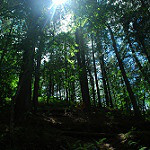

In [ ]:
forest = list(data_dir.glob('forest/*'))
PIL.Image.open(str(forest[32]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 6 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


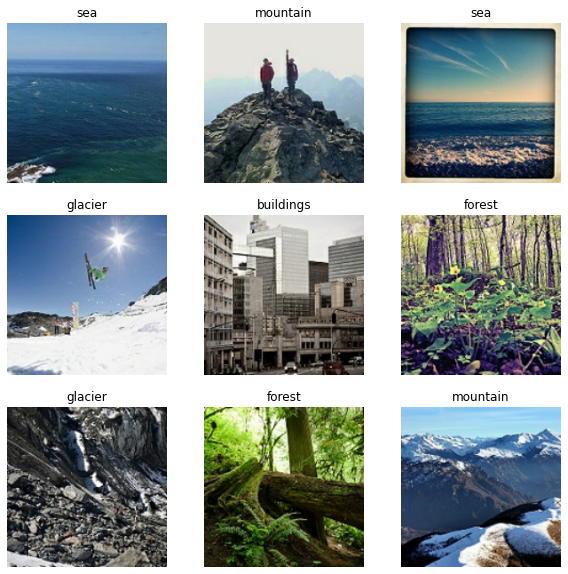

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
num_classes = 6

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #standardizing the data
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

439/439 [==============================] - 827s 2s/step - loss: 0.9544 - accuracy: 0.6313 - val_loss: 0.6862 - val_accuracy: 0.7533


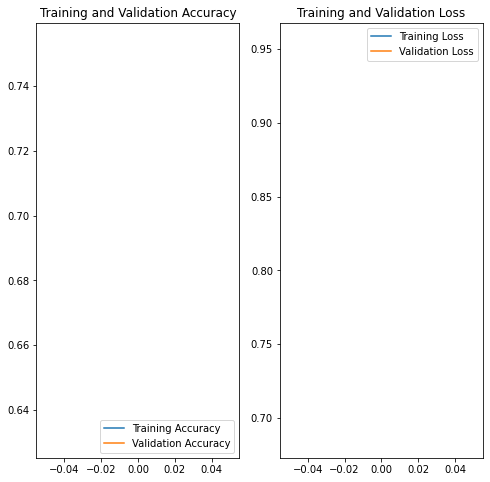

In [ ]:
epochs=1
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
#dropout technique
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

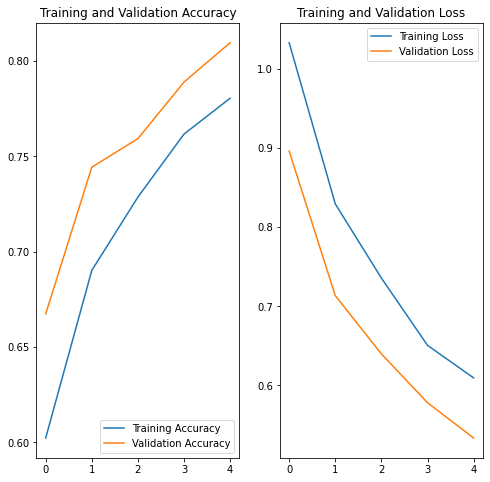

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



seg_pred/seg_pred/10059.jpg


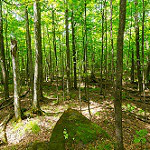

In [ ]:
image_path = 'seg_pred/seg_pred/'
image_data = pathlib.Path(image_path)
imageList = list(image_data.glob('*'))
print(imageList[16])
PIL.Image.open(str(imageList[16]))


In [ ]:
img = keras.preprocessing.image.load_img(
    imageList[16], target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to forest with a 100.00 percent confidence.


seg_pred/seg_pred/10342.jpg


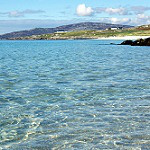

In [ ]:
image_path = 'seg_pred/seg_pred/'
image_data = pathlib.Path(image_path)
imageList = list(image_data.glob('*'))
print(imageList[100])
PIL.Image.open(str(imageList[100]))


In [ ]:
img = keras.preprocessing.image.load_img(
    imageList[100], target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sea with a 97.01 percent confidence.
